In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import wbdata
import datetime as dt
import pandas_datareader as pdr
import numpy as np

In [401]:
# Set the date range
now = dt.datetime(2024,1,1)
start = dt.datetime(1999, 1, 1)
end = dt.datetime(now.year, now.month, now.day) # today as end date 

# Download the data
df = pdr.get_data_fred(['IRLTLT01USM156N','FEDFUNDS','CORESTICKM159SFRBATL'], start, end)
df.index = pd.to_datetime(df.index)
df_weekly = df.resample('W').ffill()
print(df_weekly)

            IRLTLT01USM156N  FEDFUNDS  CORESTICKM159SFRBATL
DATE                                                       
1999-01-03             4.72      4.63              2.383116
1999-01-10             4.72      4.63              2.383116
1999-01-17             4.72      4.63              2.383116
1999-01-24             4.72      4.63              2.383116
1999-01-31             4.72      4.63              2.383116
...                     ...       ...                   ...
2023-12-10             4.02      5.33              4.554396
2023-12-17             4.02      5.33              4.554396
2023-12-24             4.02      5.33              4.554396
2023-12-31             4.02      5.33              4.554396
2024-01-07              NaN      5.33              4.603922

[1306 rows x 3 columns]


In [402]:
gdp = pdr.get_data_fred(['GDP'], start, end)
gdp.index = pd.to_datetime(gdp.index)
# Calculate the annual GDP growth rate
gdp['GDP Growth'] = gdp['GDP'].pct_change(4) * 100
gdp = gdp.resample('W').ffill()
print(gdp)

                  GDP  GDP Growth
DATE                             
1999-01-03   9411.682         NaN
1999-01-10   9411.682         NaN
1999-01-17   9411.682         NaN
1999-01-24   9411.682         NaN
1999-01-31   9411.682         NaN
...               ...         ...
2023-09-03  27610.128    6.214701
2023-09-10  27610.128    6.214701
2023-09-17  27610.128    6.214701
2023-09-24  27610.128    6.214701
2023-10-01  27938.831    5.795223

[1292 rows x 2 columns]


In [403]:
df=pd.concat([df_weekly, gdp], axis=1)
df


,IRLTLT01USM156N,FEDFUNDS,CORESTICKM159SFRBATL,GDP,GDP Growth
DATE,,,,,
1999-01-03,4.72,4.63,2.383116,9411.682,NaN
1999-01-10,4.72,4.63,2.383116,9411.682,NaN
1999-01-17,4.72,4.63,2.383116,9411.682,NaN
1999-01-24,4.72,4.63,2.383116,9411.682,NaN
1999-01-31,4.72,4.63,2.383116,9411.682,NaN
...,...,...,...,...,...
2023-12-10,4.02,5.33,4.554396,NaN,NaN
2023-12-17,4.02,5.33,4.554396,NaN,NaN
2023-12-24,4.02,5.33,4.554396,NaN,NaN


In [404]:



# Rename the variables
df.rename(columns={'IRLTLT01USM156N': '10-year yield', 'FEDFUNDS': 'Fed funds rate', 'CORESTICKM159SFRBATL': 'Core CPI','GDP Growth': 'GDP Growth'}, inplace=True)

df


,10-year yield,Fed funds rate,Core CPI,GDP,GDP Growth
DATE,,,,,
1999-01-03,4.72,4.63,2.383116,9411.682,NaN
1999-01-10,4.72,4.63,2.383116,9411.682,NaN
1999-01-17,4.72,4.63,2.383116,9411.682,NaN
1999-01-24,4.72,4.63,2.383116,9411.682,NaN
1999-01-31,4.72,4.63,2.383116,9411.682,NaN
...,...,...,...,...,...
2023-12-10,4.02,5.33,4.554396,NaN,NaN
2023-12-17,4.02,5.33,4.554396,NaN,NaN
2023-12-24,4.02,5.33,4.554396,NaN,NaN


In [405]:
# Shift Fed funds rate and 10-year yield one year ahead
df['Fed funds rate'] = df['Fed funds rate'].shift(-52)
df['10-year yield'] = df['10-year yield'].shift(-52)

print(df)
na_values = df.isna().sum()
print(na_values)

            10-year yield  Fed funds rate  Core CPI       GDP  GDP Growth
DATE                                                                     
1999-01-03           6.66            5.45  2.383116  9411.682         NaN
1999-01-10           6.66            5.45  2.383116  9411.682         NaN
1999-01-17           6.66            5.45  2.383116  9411.682         NaN
1999-01-24           6.66            5.45  2.383116  9411.682         NaN
1999-01-31           6.66            5.45  2.383116  9411.682         NaN
...                   ...             ...       ...       ...         ...
2023-12-10            NaN             NaN  4.554396       NaN         NaN
2023-12-17            NaN             NaN  4.554396       NaN         NaN
2023-12-24            NaN             NaN  4.554396       NaN         NaN
2023-12-31            NaN             NaN  4.554396       NaN         NaN
2024-01-07            NaN             NaN  4.603922       NaN         NaN

[1306 rows x 5 columns]
10-year yield

In [406]:

df_clean=df.dropna()
df_clean=df_clean.drop(columns=['GDP'])
df_clean

,10-year yield,Fed funds rate,Core CPI,GDP Growth
DATE,,,,
2000-01-02,5.24,6.40,2.335519,6.274086
2000-01-09,5.16,5.98,2.335519,6.274086
2000-01-16,5.16,5.98,2.335519,6.274086
2000-01-23,5.16,5.98,2.335519,6.274086
2000-01-30,5.16,5.98,2.335519,6.274086
...,...,...,...,...
2022-12-04,4.02,5.33,6.538167,7.113487
2022-12-11,4.02,5.33,6.538167,7.113487
2022-12-18,4.02,5.33,6.538167,7.113487


In [407]:
stock = yf.Ticker("^GSPC")
stock = stock.history(start="2000-01-02",end="2023-01-01")
stock = stock.resample('W').ffill()

In [408]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-09 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0
2000-01-16 00:00:00-05:00,1449.680054,1473.000000,1449.680054,1465.150024,1085900000,0.0,0.0
2000-01-23 00:00:00-05:00,1445.569946,1453.180054,1439.599976,1441.359985,1209800000,0.0,0.0
2000-01-30 00:00:00-05:00,1398.560059,1398.560059,1356.199951,1360.160034,1095800000,0.0,0.0
2000-02-06 00:00:00-05:00,1424.969971,1435.910034,1420.630005,1424.369995,1045100000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-04 00:00:00-05:00,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0
2022-12-11 00:00:00-05:00,3954.169922,3977.020020,3933.040039,3934.379883,3888260000,0.0,0.0
2022-12-18 00:00:00-05:00,3890.909912,3890.909912,3827.909912,3852.360107,7493660000,0.0,0.0


In [409]:
stock.index

DatetimeIndex(['2000-01-09 00:00:00-05:00', '2000-01-16 00:00:00-05:00',
               '2000-01-23 00:00:00-05:00', '2000-01-30 00:00:00-05:00',
               '2000-02-06 00:00:00-05:00', '2000-02-13 00:00:00-05:00',
               '2000-02-20 00:00:00-05:00', '2000-02-27 00:00:00-05:00',
               '2000-03-05 00:00:00-05:00', '2000-03-12 00:00:00-05:00',
               ...
               '2022-10-30 00:00:00-04:00', '2022-11-06 00:00:00-04:00',
               '2022-11-13 00:00:00-05:00', '2022-11-20 00:00:00-05:00',
               '2022-11-27 00:00:00-05:00', '2022-12-04 00:00:00-05:00',
               '2022-12-11 00:00:00-05:00', '2022-12-18 00:00:00-05:00',
               '2022-12-25 00:00:00-05:00', '2023-01-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1200, freq='W-SUN')

<Axes: xlabel='Date'>

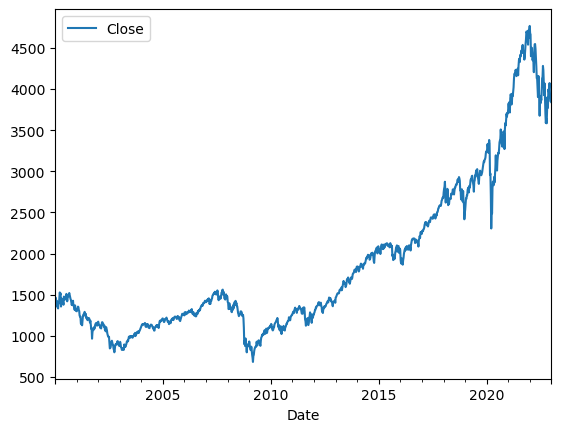

In [410]:
stock.plot.line(y="Close", use_index=True)

In [411]:
col_names = stock.columns.tolist()

# Delete the last two columns
df_stock = stock.drop(columns=col_names[-2:])
df_stock.index = df_stock.index.tz_localize(None)
df_stock

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-09,1403.449951,1441.469971,1400.729980,1441.469971,1225200000
2000-01-16,1449.680054,1473.000000,1449.680054,1465.150024,1085900000
2000-01-23,1445.569946,1453.180054,1439.599976,1441.359985,1209800000
2000-01-30,1398.560059,1398.560059,1356.199951,1360.160034,1095800000
2000-02-06,1424.969971,1435.910034,1420.630005,1424.369995,1045100000
...,...,...,...,...,...
2022-12-04,4040.169922,4080.479980,4026.629883,4071.699951,4012620000
2022-12-11,3954.169922,3977.020020,3933.040039,3934.379883,3888260000
2022-12-18,3890.909912,3890.909912,3827.909912,3852.360107,7493660000


In [412]:
dfs=pd.concat([df_clean, df_stock], axis=1)
dat=dfs.dropna()
dat

,10-year yield,Fed funds rate,Core CPI,GDP Growth,Open,High,Low,Close,Volume
2000-01-09,5.16,5.98,2.335519,6.274086,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09
2000-01-16,5.16,5.98,2.335519,6.274086,1449.680054,1473.000000,1449.680054,1465.150024,1.085900e+09
2000-01-23,5.16,5.98,2.335519,6.274086,1445.569946,1453.180054,1439.599976,1441.359985,1.209800e+09
2000-01-30,5.16,5.98,2.335519,6.274086,1398.560059,1398.560059,1356.199951,1360.160034,1.095800e+09
2000-02-06,5.10,5.49,2.379221,6.274086,1424.969971,1435.910034,1420.630005,1424.369995,1.045100e+09
...,...,...,...,...,...,...,...,...,...
2022-12-04,4.02,5.33,6.538167,7.113487,4040.169922,4080.479980,4026.629883,4071.699951,4.012620e+09
2022-12-11,4.02,5.33,6.538167,7.113487,3954.169922,3977.020020,3933.040039,3934.379883,3.888260e+09
2022-12-18,4.02,5.33,6.538167,7.113487,3890.909912,3890.909912,3827.909912,3852.360107,7.493660e+09
2022-12-25,4.02,5.33,6.538167,7.113487,3815.110107,3845.800049,3797.010010,3844.820068,2.819280e+09


In [413]:
dat["Next Week"] = data["Close"].shift(-1)

C:\Users\caoqu\AppData\Local\Temp\ipykernel_24312\3396748482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["Next Week"] = data["Close"].shift(-1)


In [414]:
dat["Target"] = (dat["Next Week"] > dat["Close"]).astype(int)

C:\Users\caoqu\AppData\Local\Temp\ipykernel_24312\3299381895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["Target"] = (dat["Next Week"] > dat["Close"]).astype(int)


In [415]:
dat

,10-year yield,Fed funds rate,Core CPI,GDP Growth,Open,High,Low,Close,Volume,Next Week,Target
2000-01-09,5.16,5.98,2.335519,6.274086,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09,1465.150024,1
2000-01-16,5.16,5.98,2.335519,6.274086,1449.680054,1473.000000,1449.680054,1465.150024,1.085900e+09,1441.359985,0
2000-01-23,5.16,5.98,2.335519,6.274086,1445.569946,1453.180054,1439.599976,1441.359985,1.209800e+09,1360.160034,0
2000-01-30,5.16,5.98,2.335519,6.274086,1398.560059,1398.560059,1356.199951,1360.160034,1.095800e+09,1424.369995,1
2000-02-06,5.10,5.49,2.379221,6.274086,1424.969971,1435.910034,1420.630005,1424.369995,1.045100e+09,1387.119995,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,4.02,5.33,6.538167,7.113487,4040.169922,4080.479980,4026.629883,4071.699951,4.012620e+09,3934.379883,0
2022-12-11,4.02,5.33,6.538167,7.113487,3954.169922,3977.020020,3933.040039,3934.379883,3.888260e+09,3852.360107,0
2022-12-18,4.02,5.33,6.538167,7.113487,3890.909912,3890.909912,3827.909912,3852.360107,7.493660e+09,3844.820068,0
2022-12-25,4.02,5.33,6.538167,7.113487,3815.110107,3845.800049,3797.010010,3844.820068,2.819280e+09,3839.500000,0


In [416]:
dat.index = pd.to_datetime(dat.index) 

In [417]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = dat.iloc[:-100]
test = dat.iloc[-100:]

predictors = ["10-year yield","Fed funds rate","Core CPI","GDP Growth","Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [418]:
preds = model.predict(test[predictors])

In [419]:
preds = pd.Series(preds, index=test.index)

In [420]:
precision_score(test["Target"], preds)

0.5217391304347826

In [421]:
combined = pd.concat([test["Target"], preds], axis=1)
print(combined)

            Target  0
2021-02-07       1  0
2021-02-14       0  1
2021-02-21       0  0
2021-02-28       1  0
2021-03-07       1  0
...            ... ..
2022-12-04       0  0
2022-12-11       0  0
2022-12-18       0  0
2022-12-25       0  1
2023-01-01       0  1

[100 rows x 2 columns]


<Axes: >

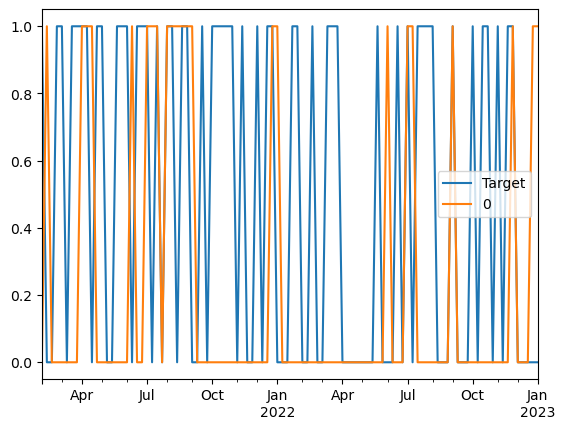

In [422]:
combined.plot()

In [423]:
def predict(train, test,predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [424]:
def backtest(data, model, predictors, start=1000, step=150):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [425]:
predictions = backtest(dat, model, predictors)

In [426]:
predictions["Predictions"].value_counts()

Predictions
0    122
1     78
Name: count, dtype: int64

In [427]:
precision_score(predictions["Target"], predictions["Predictions"])

0.47435897435897434

In [428]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.545
0    0.455
Name: count, dtype: float64

In [429]:
horizons = [4,26,30,40,52]
new_predictors = []

for horizon in horizons:
  rolling_average = dat.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  dat[ratio_column] = dat["Close"] / rolling_average["Close"]

  trend_column = f"Trend_{horizon}"
  dat[trend_column] = dat.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

C:\Users\caoqu\AppData\Local\Temp\ipykernel_24312\2547505683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[ratio_column] = dat["Close"] / rolling_average["Close"]
C:\Users\caoqu\AppData\Local\Temp\ipykernel_24312\2547505683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat[trend_column] = dat.shift(1).rolling(horizon).sum()["Target"]
C:\Users\caoqu\AppData\Local\Temp\ipykernel_24312\2547505683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [430]:
dat

,10-year yield,Fed funds rate,Core CPI,GDP Growth,Open,High,Low,Close,Volume,Next Week,...,Close_Ratio_4,Trend_4,Close_Ratio_26,Trend_26,Close_Ratio_30,Trend_30,Close_Ratio_40,Trend_40,Close_Ratio_52,Trend_52
2000-01-09,5.16,5.98,2.335519,6.274086,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09,1465.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,5.16,5.98,2.335519,6.274086,1449.680054,1473.000000,1449.680054,1465.150024,1.085900e+09,1441.359985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-23,5.16,5.98,2.335519,6.274086,1445.569946,1453.180054,1439.599976,1441.359985,1.209800e+09,1360.160034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-30,5.16,5.98,2.335519,6.274086,1398.560059,1398.560059,1356.199951,1360.160034,1.095800e+09,1424.369995,...,0.953137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-06,5.10,5.49,2.379221,6.274086,1424.969971,1435.910034,1420.630005,1424.369995,1.045100e+09,1387.119995,...,1.001132,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,4.02,5.33,6.538167,7.113487,4040.169922,4080.479980,4026.629883,4071.699951,4.012620e+09,3934.379883,...,1.014369,3.0,1.040683,13.0,1.035900,14.0,1.009028,17.0,0.979962,23.0
2022-12-11,4.02,5.33,6.538167,7.113487,3954.169922,3977.020020,3933.040039,3934.379883,3.888260e+09,3852.360107,...,0.983746,2.0,1.005254,13.0,1.001724,14.0,0.977386,17.0,0.950332,22.0
2022-12-18,4.02,5.33,6.538167,7.113487,3890.909912,3890.909912,3827.909912,3852.360107,7.493660e+09,3844.820068,...,0.970089,2.0,0.982584,13.0,0.981250,14.0,0.959107,17.0,0.933854,22.0
2022-12-25,4.02,5.33,6.538167,7.113487,3815.110107,3845.800049,3797.010010,3844.820068,2.819280e+09,3839.500000,...,0.979369,1.0,0.981305,12.0,0.981942,13.0,0.960928,16.0,0.935869,21.0


In [431]:
dat = dat.dropna()

In [432]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [433]:
def predict(train, test,predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [434]:
predictions = backtest(dat, model, new_predictors)

In [435]:
predictions["Predictions"].value_counts()

Predictions
0.0    112
1.0     35
Name: count, dtype: int64

In [436]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6